In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  olist_customers_dataset
xolist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_customers_dataset: ', xolist_customers_dataset.shape)
xolist_customers_dataset.head(10)

forme des données olist_customers_dataset:  (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [3]:
#  Données  olist_geolocation_dataset
xolist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_geolocation_dataset: ', xolist_geolocation_dataset.shape)
#xolist_geolocation_dataset.head(10)

forme des données olist_geolocation_dataset:  (1000163, 5)


In [4]:
#  Données  olist_order_items_dataset
xolist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_items_dataset: ', xolist_order_items_dataset.shape)
#xolist_order_items_dataset.head(10)

forme des données olist_order_items_dataset:  (112650, 7)


In [5]:
#  Données  olist_order_payments_dataset
xolist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_payments_dataset: ', xolist_order_payments_dataset.shape)
#xolist_order_payments_dataset.head(10)

forme des données olist_order_payments_dataset:  (103886, 5)


In [6]:
#  Données  olist_order_reviews_dataset
xolist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_reviews_dataset: ', xolist_order_reviews_dataset.shape)
#xolist_order_reviews_dataset.head(10)

forme des données olist_order_reviews_dataset:  (100000, 7)


In [7]:
#  Données  olist_orders_dataset
xolist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_orders_dataset: ', xolist_orders_dataset.shape)
#xolist_orders_dataset.head(10)

forme des données olist_orders_dataset:  (99441, 8)


In [8]:
#  Données d olist_products_dataset
xolist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d olist_products_dataset: ', xolist_products_dataset.shape)
#xolist_products_dataset.head(10)

forme des données d olist_products_dataset:  (32951, 9)


In [9]:
# Fonctionnalités  des données olist_sellers_dataset
xolist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep = ',', low_memory=False )

print('forme des fonctionnalités  des données olist_sellers_dataset: ', xolist_sellers_dataset.shape)
#xolist_sellers_dataset.head(10)

forme des fonctionnalités  des données olist_sellers_dataset:  (3095, 4)


# *          La présentation générale du jeu de données et nettoyage            *


In [10]:
#Permet d'obtenir la somme des NaN .
xolist_customers_dataset.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
#recherche de doublons
xolist_customers_dataset.duplicated(subset=['customer_unique_id']).sum()

3345

### Je ne supprime pas les doublons car certains clients ont fait plusieurs achats par commandes.

In [12]:
#suppression de doublons en gardant le dernier
#xolist_customers_dataset=xolist_customers_dataset.drop_duplicates(subset=['customer_unique_id'], keep='last')
#xolist_customers_dataset

Diagramme barre horizontale customer_state

Commentaire.



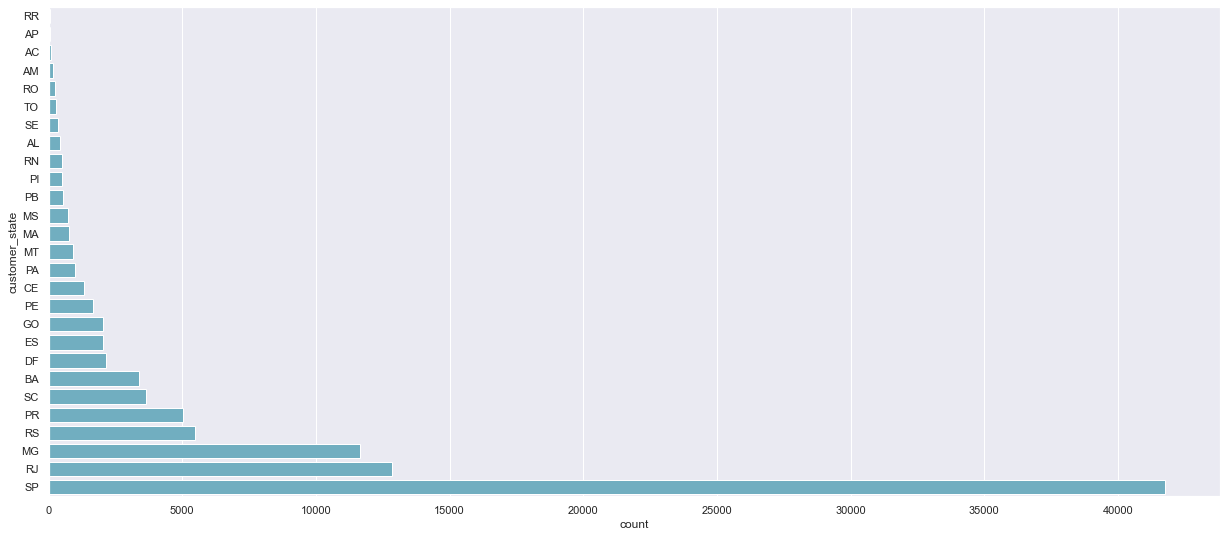

In [13]:
print ('Diagramme barre horizontale customer_state\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize=(21, 9))
sns.countplot(y="customer_state", data=xolist_customers_dataset, order=xolist_customers_dataset['customer_state'].value_counts().sort_values().index, color="c");

#### Analyse bivariée : customer_zip_code_prefix en fonction de customer_state

In [14]:
X = "customer_state" # qualitative
Y = "customer_zip_code_prefix" # quantitative
#sous echantillon customer_zip_code_prefix
sous_echantillon1 = xolist_customers_dataset[xolist_customers_dataset["customer_zip_code_prefix"] < 99990.000000].copy()

# On étudie le customer_state:
sous_echantillon1 = sous_echantillon1[sous_echantillon1["customer_state"] != "none"] 

In [15]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

Nous observons que la catégorie .. est la catégorie qui a ... les plus élevés.


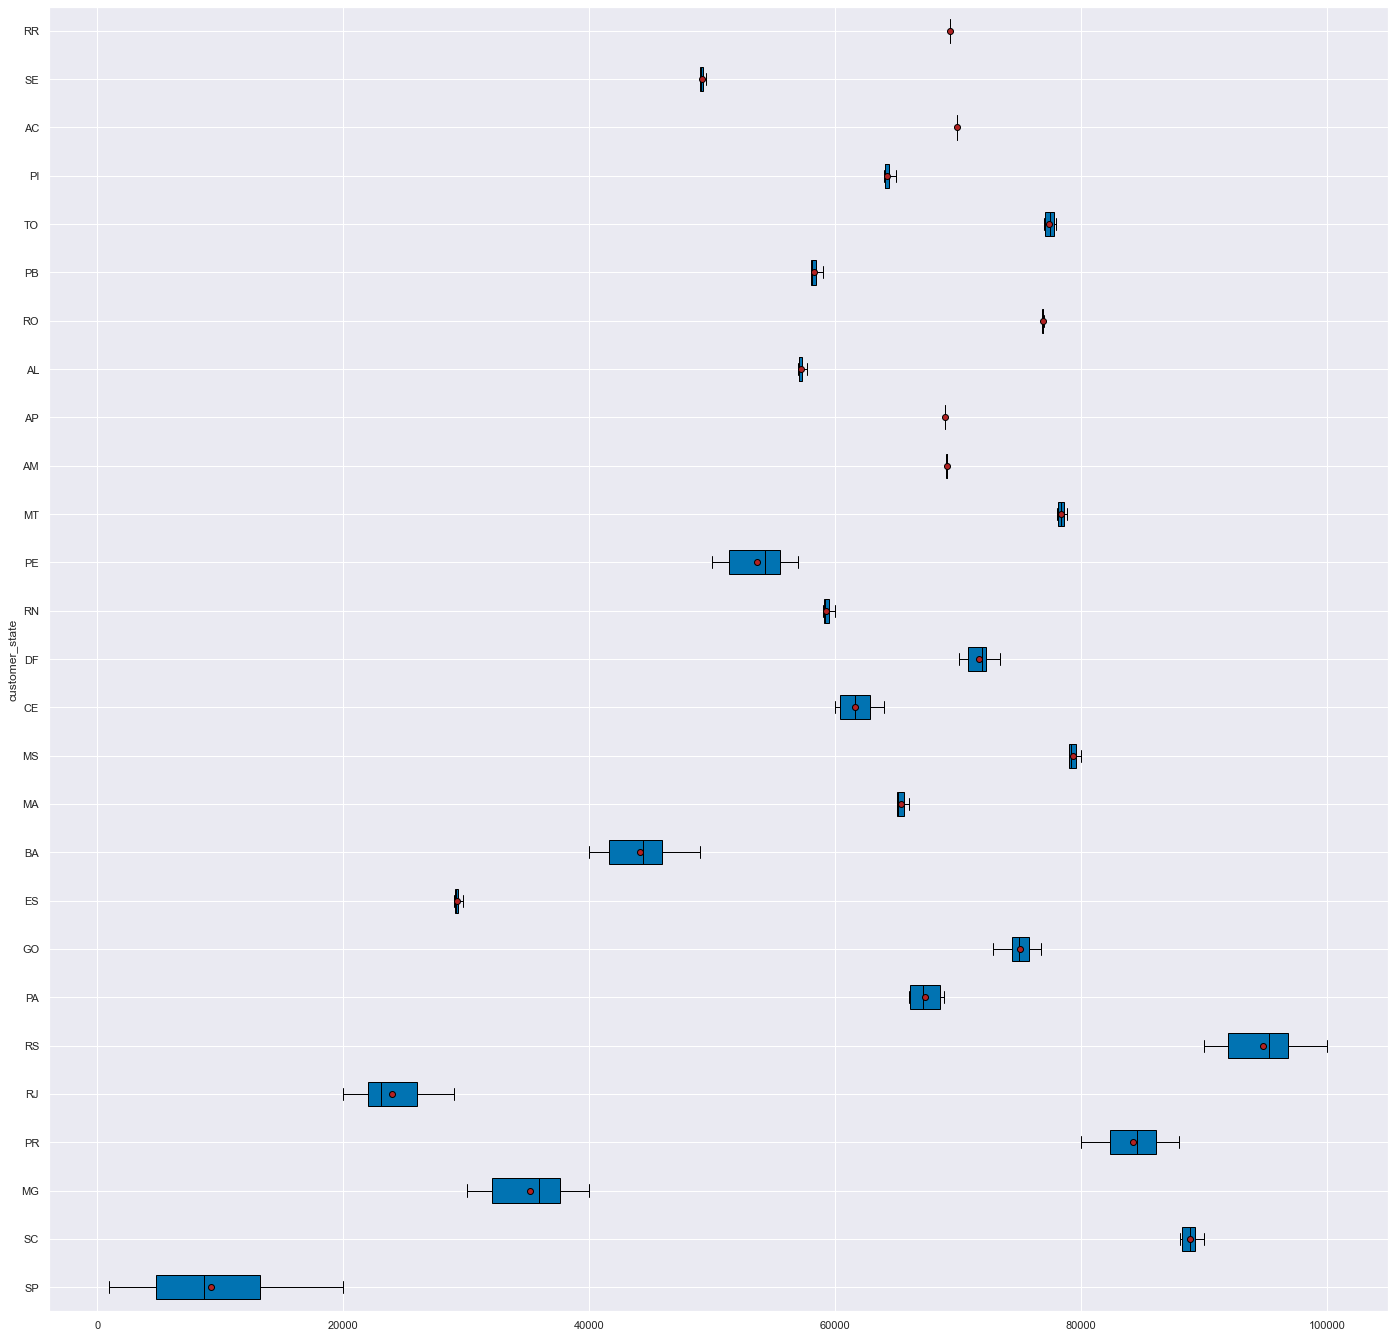

In [16]:
modalites = sous_echantillon1[X].unique()
groupes = []
print('Nous observons que la catégorie .. est la catégorie qui a ... les plus élevés.')

for m in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
fig = plt.figure(figsize=(24, 24))
plt.ylabel("customer_state")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [17]:
effectifs = xolist_customers_dataset["customer_city"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_city"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_customers_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_customers_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

       customer_city      n         f  pourcentage
0          sao paulo  15540  0.156274    15.627357
1     rio de janeiro   6882  0.069207     6.920687
2     belo horizonte   2773  0.027886     2.788588
3           brasilia   2131  0.021430     2.142979
4           curitiba   1521  0.015296     1.529550
...              ...    ...       ...          ...
4114      japaratuba      1  0.000010     0.001006
4115         ouvidor      1  0.000010     0.001006
4116      paripueira      1  0.000010     0.001006
4117  gramado xavier      1  0.000010     0.001006
4118        virginia      1  0.000010     0.001006

[4119 rows x 4 columns]


In [18]:
effectifs = xolist_customers_dataset["customer_state"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_state"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_customers_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_customers_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

   customer_state      n         f  pourcentage
0              SP  41746  0.419807    41.980672
1              RJ  12852  0.129242    12.924247
2              MG  11635  0.117004    11.700405
3              RS   5466  0.054967     5.496727
4              PR   5045  0.050734     5.073360
5              SC   3637  0.036574     3.657445
6              BA   3380  0.033990     3.399000
7              DF   2140  0.021520     2.152030
8              ES   2033  0.020444     2.044428
9              GO   2020  0.020314     2.031355
10             PE   1652  0.016613     1.661287
11             CE   1336  0.013435     1.343510
12             PA    975  0.009805     0.980481
13             MT    907  0.009121     0.912099
14             MA    747  0.007512     0.751199
15             MS    715  0.007190     0.719019
16             PB    536  0.005390     0.539013
17             PI    495  0.004978     0.497783
18             RN    485  0.004877     0.487726
19             AL    413  0.004153     0

### Jointure en customer_id de xolist_orders_dataset et xolist_customers_dataset

In [19]:
dataset_Orders_merge1 = pd.merge(xolist_orders_dataset, xolist_customers_dataset, how='inner', on=['customer_id'])
#dataset_Orders_merge1

### Jointure en order_id de dataset_Orders_merge1 et xolist_order_payments_dataset

In [20]:
dataset_Orders_merge2 = pd.merge(dataset_Orders_merge1, xolist_order_payments_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge2

### Jointure en order_id de dataset_Orders_merge2 et xolist_order_reviews_dataset

In [21]:
dataset_Orders_merge3 = pd.merge(dataset_Orders_merge2, xolist_order_reviews_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge3

### Jointure en order_id de dataset_Orders_merge3 et xolist_order_items_dataset

In [22]:
XOrders = pd.merge(dataset_Orders_merge3, xolist_order_items_dataset, how='inner', on=['order_id'])
#XOrders

### Jointure en customer_id de xolist_customers_dataset et XOrders

In [23]:
dataset_Customer_merge1 = pd.merge(xolist_customers_dataset, XOrders, how='inner', on=['customer_id'])
#dataset_Customer_merge1

### Jointure en zip_code_prefix de dataset_Customer_merge1 et xolist_geolocation_dataset¶

In [24]:
dataset_Customer_merge1 = dataset_Customer_merge1.rename(columns = {'customer_zip_code_prefix_x': 'zip_code_prefix'})
#dataset_Customer_merge1

In [25]:
xolist_geolocation_dataset = xolist_geolocation_dataset.rename(columns = {'geolocation_zip_code_prefix': 'zip_code_prefix'})
#xolist_geolocation_dataset

In [26]:
XCustomer = pd.merge(dataset_Customer_merge1, xolist_geolocation_dataset, how='inner', on=['zip_code_prefix'])
XCustomer

,customer_id,customer_unique_id_x,zip_code_prefix,customer_city_x,customer_state_x,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063957,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.821866,-49.244027,aparecida de goiania,GO
18063958,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.821866,-49.244027,aparecida de goiania,GO
18063959,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.822945,-49.244615,aparecida de goiania,GO
18063960,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,ab042583eff2cb1ffe2110a95da95d4b,delivered,2018-01-22 12:02:21,2018-01-22 14:19:01,2018-01-24 14:36:32,...,1,66a0a6e02b7f543e5b021ce361f267d4,7a67c85e85bb2ce8582c35f2203ad736,2018-01-26 14:19:01,139.99,18.23,-28.226596,-52.467505,passo fundo,RS


In [27]:
XCustomer.describe()

,zip_code_prefix,customer_zip_code_prefix_y,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value,geolocation_lat,geolocation_lng
count,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07,1.806396e+07
mean,3.271400e+04,3.271400e+04,1.093581e+00,2.937483e+00,1.742514e+02,4.013714e+00,1.205458e+00,1.213965e+02,1.960432e+01,-2.197079e+01,-4.594402e+01
std,2.697294e+04,2.697294e+04,6.902575e-01,2.799021e+00,2.664830e+02,1.410766e+00,6.996979e-01,1.861820e+02,1.495320e+01,4.276823e+00,3.557254e+00
min,1.003000e+03,1.003000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,8.500000e-01,0.000000e+00,-3.660537e+01,-1.014668e+02
25%,1.314000e+04,1.314000e+04,1.000000e+00,1.000000e+00,6.163000e+01,4.000000e+00,1.000000e+00,3.990000e+01,1.347000e+01,-2.357587e+01,-4.761394e+01
50%,2.386000e+04,2.386000e+04,1.000000e+00,1.000000e+00,1.100000e+02,5.000000e+00,1.000000e+00,7.499000e+01,1.625000e+01,-2.291096e+01,-4.645645e+01
75%,3.840000e+04,3.840000e+04,1.000000e+00,4.000000e+00,1.915800e+02,5.000000e+00,1.000000e+00,1.350000e+02,2.032000e+01,-2.044249e+01,-4.335166e+01
max,9.999000e+04,9.999000e+04,2.900000e+01,2.400000e+01,1.366408e+04,5.000000e+00,2.100000e+01,6.735000e+03,4.096800e+02,4.506593e+01,1.382021e+01


In [28]:
XCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18063962 entries, 0 to 18063961
Data columns (total 36 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id_x           object 
 2   zip_code_prefix                int64  
 3   customer_city_x                object 
 4   customer_state_x               object 
 5   order_id                       object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_carrier_date   object 
 10  order_delivered_customer_date  object 
 11  order_estimated_delivery_date  object 
 12  customer_unique_id_y           object 
 13  customer_zip_code_prefix_y     int64  
 14  customer_city_y                object 
 15  customer_state_y               object 
 16  payment_sequential             int64  
 17  payment_type                   object 
 18  

In [29]:
import numpy as np

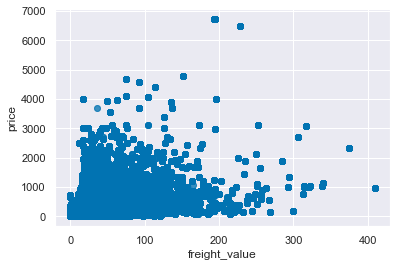

In [30]:

plt.plot(XCustomer["freight_value"],XCustomer["price"],'o',alpha=0.5)
plt.xlabel("freight_value")
plt.ylabel("price")
plt.show()

In [31]:
effectifs = XCustomer["order_status"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["order_status"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,order_status,n,f,pourcentage
0,delivered,17692010,0.979409,97.940917
1,shipped,165501,0.009162,0.916194
2,canceled,81268,0.004499,0.449890
3,invoiced,64212,0.003555,0.355470
4,processing,59072,0.003270,0.327016
5,unavailable,1241,0.000069,0.006870
6,approved,658,0.000036,0.003643


In [32]:
effectifs = XCustomer["review_comment_title"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["review_comment_title"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,review_comment_title,n,f,pourcentage
0,Recomendo,76215,4.219174e-03,0.421917
1,recomendo,59982,3.320534e-03,0.332053
2,super recomendo,43212,2.392166e-03,0.239217
3,Muito bom,43070,2.384305e-03,0.238431
4,Bom,40773,2.257146e-03,0.225715
...,...,...,...,...
4550,Péssimo produto,1,5.535884e-08,0.000006
4551,De ótima qualidade!!!,1,5.535884e-08,0.000006
4552,Uma porcaria,1,5.535884e-08,0.000006
4553,Grau incorretp,1,5.535884e-08,0.000006


In [33]:
effectifs = XCustomer["review_comment_message"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["review_comment_message"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,review_comment_message,n,f,pourcentage
0,Muito bom,37202,2.059460e-03,0.205946
1,Bom,27739,1.535599e-03,0.153560
2,Otimo,17658,9.775264e-04,0.097753
3,Recomendo,17291,9.572097e-04,0.095721
4,bom,15633,8.654248e-04,0.086542
...,...,...,...,...
36335,Adoro comprar nessa loja..,1,5.535884e-08,0.000006
36336,EXCELENTE E LINDA.,1,5.535884e-08,0.000006
36337,Qualidade deixa a desejar pelo preço,1,5.535884e-08,0.000006
36338,Não gostei não véi igual da foto é o material ...,1,5.535884e-08,0.000006


In [34]:
effectifs = XCustomer["payment_type"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["payment_type"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,payment_type,n,f,pourcentage
0,credit_card,13357037,0.739430,73.943009
1,boleto,3485791,0.192969,19.296935
2,voucher,962062,0.053259,5.325864
3,debit_card,259072,0.014342,1.434193


In [35]:
effectifs = XCustomer["customer_city_y"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_city_y"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,customer_city_y,n,f,pourcentage
0,rio de janeiro,2285652,1.265310e-01,12.653105
1,sao paulo,1654303,9.158030e-02,9.158030
2,belo horizonte,879798,4.870460e-02,4.870460
3,niteroi,570086,3.155930e-02,3.155930
4,curitiba,307002,1.699527e-02,1.699527
...,...,...,...,...
4061,lagoa do piaui,1,5.535884e-08,0.000006
4062,curral de cima,1,5.535884e-08,0.000006
4063,pedra menina,1,5.535884e-08,0.000006
4064,andrequice,1,5.535884e-08,0.000006


In [36]:
effectifs = XCustomer["customer_city_x"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["customer_city_x"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,customer_city_x,n,f,pourcentage
0,rio de janeiro,2285652,1.265310e-01,12.653105
1,sao paulo,1654303,9.158030e-02,9.158030
2,belo horizonte,879798,4.870460e-02,4.870460
3,niteroi,570086,3.155930e-02,3.155930
4,curitiba,307002,1.699527e-02,1.699527
...,...,...,...,...
4061,lagoa do piaui,1,5.535884e-08,0.000006
4062,curral de cima,1,5.535884e-08,0.000006
4063,pedra menina,1,5.535884e-08,0.000006
4064,andrequice,1,5.535884e-08,0.000006


In [37]:
effectifs = XCustomer["geolocation_city"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["geolocation_city"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(XCustomer) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(XCustomer)*100 # len(data) renvoie la taille de l'échantillon
tab

,geolocation_city,n,f,pourcentage
0,rio de janeiro,2285597,1.265280e-01,12.652800
1,sao paulo,1404354,7.774341e-02,7.774341
2,belo horizonte,879809,4.870521e-02,4.870521
3,niteroi,494795,2.739128e-02,2.739128
4,curitiba,306989,1.699456e-02,1.699456
...,...,...,...,...
5796,curral de cima,1,5.535884e-08,0.000006
5797,termas de ibira,1,5.535884e-08,0.000006
5798,aparecida doeste,1,5.535884e-08,0.000006
5799,governador lomanto junior,1,5.535884e-08,0.000006


In [38]:
#recherche de doublons
XCustomer.duplicated(subset=['order_id','customer_id','customer_unique_id_x']).sum()

17965571

In [39]:
#suppression de doublons en gardant le dernier
#XCustomer=XCustomer.drop_duplicates(subset=['customer_unique_id_x','customer_id','order_id'], keep='last')
#XCustomer

In [40]:
#Permet d'obtenir la somme des NaN .
XCustomer.isna().sum()

customer_id                             0
customer_unique_id_x                    0
zip_code_prefix                         0
customer_city_x                         0
customer_state_x                        0
order_id                                0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    2994
order_delivered_carrier_date       193626
order_delivered_customer_date      372232
order_estimated_delivery_date           0
customer_unique_id_y                    0
customer_zip_code_prefix_y              0
customer_city_y                         0
customer_state_y                        0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
review_id                               0
review_score                            0
review_comment_title             16015300
review_comment_message           1

In [41]:
#Calcul du pourcentage par colonnes des NaN
PourcentXCustomerNaN=((XCustomer.isna().sum()*100)/len(XCustomer))
PourcentXCustomerNaN

customer_id                       0.000000
customer_unique_id_x              0.000000
zip_code_prefix                   0.000000
customer_city_x                   0.000000
customer_state_x                  0.000000
order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.016574
order_delivered_carrier_date      1.071891
order_delivered_customer_date     2.060633
order_estimated_delivery_date     0.000000
customer_unique_id_y              0.000000
customer_zip_code_prefix_y        0.000000
customer_city_y                   0.000000
customer_state_y                  0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             88.658845
review_comm

In [42]:
for index, value in XCustomer.dtypes.items(): 
    if value == 'object':
        XCustomer[index] = XCustomer[index].fillna('none')
    else:
        XCustomer[index] = XCustomer[index].fillna(0)

XCustomer

,customer_id,customer_unique_id_x,zip_code_prefix,customer_city_x,customer_state_x,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063957,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.821866,-49.244027,aparecida de goiania,GO
18063958,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.821866,-49.244027,aparecida de goiania,GO
18063959,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,2018-01-24 18:12:41,2018-01-30 15:13:39,...,1,acc444eb5ad26f79d5a11baa6a03c439,1025f0e2d44d7041d6cf58b6550e0bfa,2018-01-30 18:12:41,120.00,39.77,-16.822945,-49.244615,aparecida de goiania,GO
18063960,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,ab042583eff2cb1ffe2110a95da95d4b,delivered,2018-01-22 12:02:21,2018-01-22 14:19:01,2018-01-24 14:36:32,...,1,66a0a6e02b7f543e5b021ce361f267d4,7a67c85e85bb2ce8582c35f2203ad736,2018-01-26 14:19:01,139.99,18.23,-28.226596,-52.467505,passo fundo,RS


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import datetime as dt
NOW = dt.datetime(2020,12,18)

In [45]:
NOW

datetime.datetime(2020, 12, 18, 0, 0)

In [46]:
# Make the date_placed column datetime
XCustomer['order_purchase_timestamp'] = pd.to_datetime(XCustomer['order_purchase_timestamp'])

### RFM Récence Fréquence Montant

In [47]:
rfmTable = XCustomer.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'price': lambda x: x.sum()}) # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                         'order_id': 'frequency', 
                         'price': 'monetary_value'}, inplace=True)

In [48]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [49]:
quantiles

,recency,frequency,monetary_value
0.25,958.0,57.0,3410.0
0.50,1063.0,113.0,8716.2
0.75,1192.0,222.0,21546.0


In [50]:
quantiles = quantiles.to_dict()

In [51]:
quantiles

{'recency': {0.25: 958.0, 0.5: 1063.0, 0.75: 1192.0},
 'frequency': {0.25: 57.0, 0.5: 113.0, 0.75: 222.0},
 'monetary_value': {0.25: 3410.0, 0.5: 8716.199999999999, 0.75: 21546.0}}

In [52]:
rfmSegmentation = rfmTable

In [53]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [54]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [55]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [56]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1129,116,10416.80,3,2,2,322
000161a058600d5901f007fab4c27140,1250,106,5819.40,4,3,3,433
0001fd6190edaaf884bcaf3d49edf079,1388,201,36177.99,4,2,1,421
0002414f95344307404f0ace7a26f1d5,1219,1,149.90,4,4,4,444
000379cdec625522490c315e70c7a9fb,990,77,7161.00,2,3,3,233


In [57]:
rfmSegmentation.head(40)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1129,116,10416.80,3,2,2,322
000161a058600d5901f007fab4c27140,1250,106,5819.40,4,3,3,433
0001fd6190edaaf884bcaf3d49edf079,1388,201,36177.99,4,2,1,421
0002414f95344307404f0ace7a26f1d5,1219,1,149.90,4,4,4,444
000379cdec625522490c315e70c7a9fb,990,77,7161.00,2,3,3,233
0004164d20a9e969af783496f3408652,1345,162,9718.38,4,2,2,422
000419c5494106c306a97b5635748086,1021,1146,39307.80,2,1,1,211
00046a560d407e99b969756e0b10f282,1095,582,70363.80,3,1,1,311
00050bf6e01e69d5c0fd612f1bcfb69c,1187,512,35834.88,3,1,1,311


In [58]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(50)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
ec5b2ba62e574342386871631fafd3fc,886,1428,2556120.00,1,1,1,111
cc803a2c412833101651d3f90ca7de24,931,762,1676400.00,1,1,1,111
803cd9b04f9cd252c6a83a2ecdbc22c3,855,488,1512312.00,1,1,1,111
64c67484fd19b32ee4c9d8f944b49a5d,883,1392,1309176.00,1,1,1,111
fcc823f0ae4f596e54cd461c145dfd5d,929,641,1217259.00,1,1,1,111
db6f9af19cfaa6064936f4b3e1097223,913,965,1147385.00,1,1,1,111
dd43426ee4923b0a1c0dcd48cc1ee36e,943,515,1086650.00,1,1,1,111
e5df9583ddbe3f4f3857d9b667dfa609,952,401,1078289.00,1,1,1,111
26dcb450c4b5b390e79e6d5d0f2c6535,877,328,1020076.72,1,1,1,111


In [59]:
from collections import Counter

def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(" ")
    counter = Counter(words)
    for word in counter.most_common(100):
        print(word)



In [60]:
most_common_words(XCustomer['customer_state_x'].values)

('SP', 6741420)
('RJ', 3626862)
('MG', 3433229)
('RS', 971794)
('PR', 746528)
('SC', 644930)
('BA', 444171)
('ES', 367211)
('GO', 162421)
('MT', 155230)
('PE', 132509)
('DF', 109269)
('PA', 96310)
('CE', 74739)
('MS', 73693)
('MA', 61706)
('AL', 37741)
('PB', 33379)
('SE', 28145)
('PI', 27693)
('RN', 24818)
('RO', 24521)
('TO', 22360)
('AC', 8686)
('AM', 6488)
('AP', 5698)
('RR', 2411)


In [61]:
most_common_words(XCustomer['geolocation_state'].values)

('SP', 6741389)
('RJ', 3626836)
('MG', 3433229)
('RS', 971808)
('PR', 746514)
('SC', 644944)
('BA', 444171)
('ES', 367211)
('GO', 162415)
('MT', 155225)
('PE', 132509)
('DF', 109275)
('PA', 96310)
('CE', 74739)
('MS', 73679)
('MA', 61706)
('AL', 37741)
('PB', 33379)
('SE', 28145)
('PI', 27693)
('RN', 24818)
('RO', 24526)
('TO', 22360)
('AC', 8743)
('AM', 6488)
('AP', 5698)
('RR', 2411)


In [62]:
XCustomer.to_csv('XCustomer.csv', index = False)

In [63]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in XCustomer.columns:
    if XCustomer[col].dtype == 'object':
        XCustomer[col] = labelencoder.fit_transform(XCustomer[col])

XCustomer.head()

,customer_id,customer_unique_id_x,zip_code_prefix,customer_city_x,customer_state_x,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,2591,49912,14409,1366,25,333,2,2017-05-16 15:05:35,9290,9170,...,1,21661,1535,9269,124.99,21.88,-20.509897,-47.397866,1866,25
1,2591,49912,14409,1366,25,333,2,2017-05-16 15:05:35,9290,9170,...,1,21661,1535,9269,124.99,21.88,-20.497396,-47.399241,1866,25
2,2591,49912,14409,1366,25,333,2,2017-05-16 15:05:35,9290,9170,...,1,21661,1535,9269,124.99,21.88,-20.510459,-47.399553,1866,25
3,2591,49912,14409,1366,25,333,2,2017-05-16 15:05:35,9290,9170,...,1,21661,1535,9269,124.99,21.88,-20.480940,-47.394161,1866,25
4,2591,49912,14409,1366,25,333,2,2017-05-16 15:05:35,9290,9170,...,1,21661,1535,9269,124.99,21.88,-20.515413,-47.398194,1866,25


In [64]:
X10 = XCustomer.values

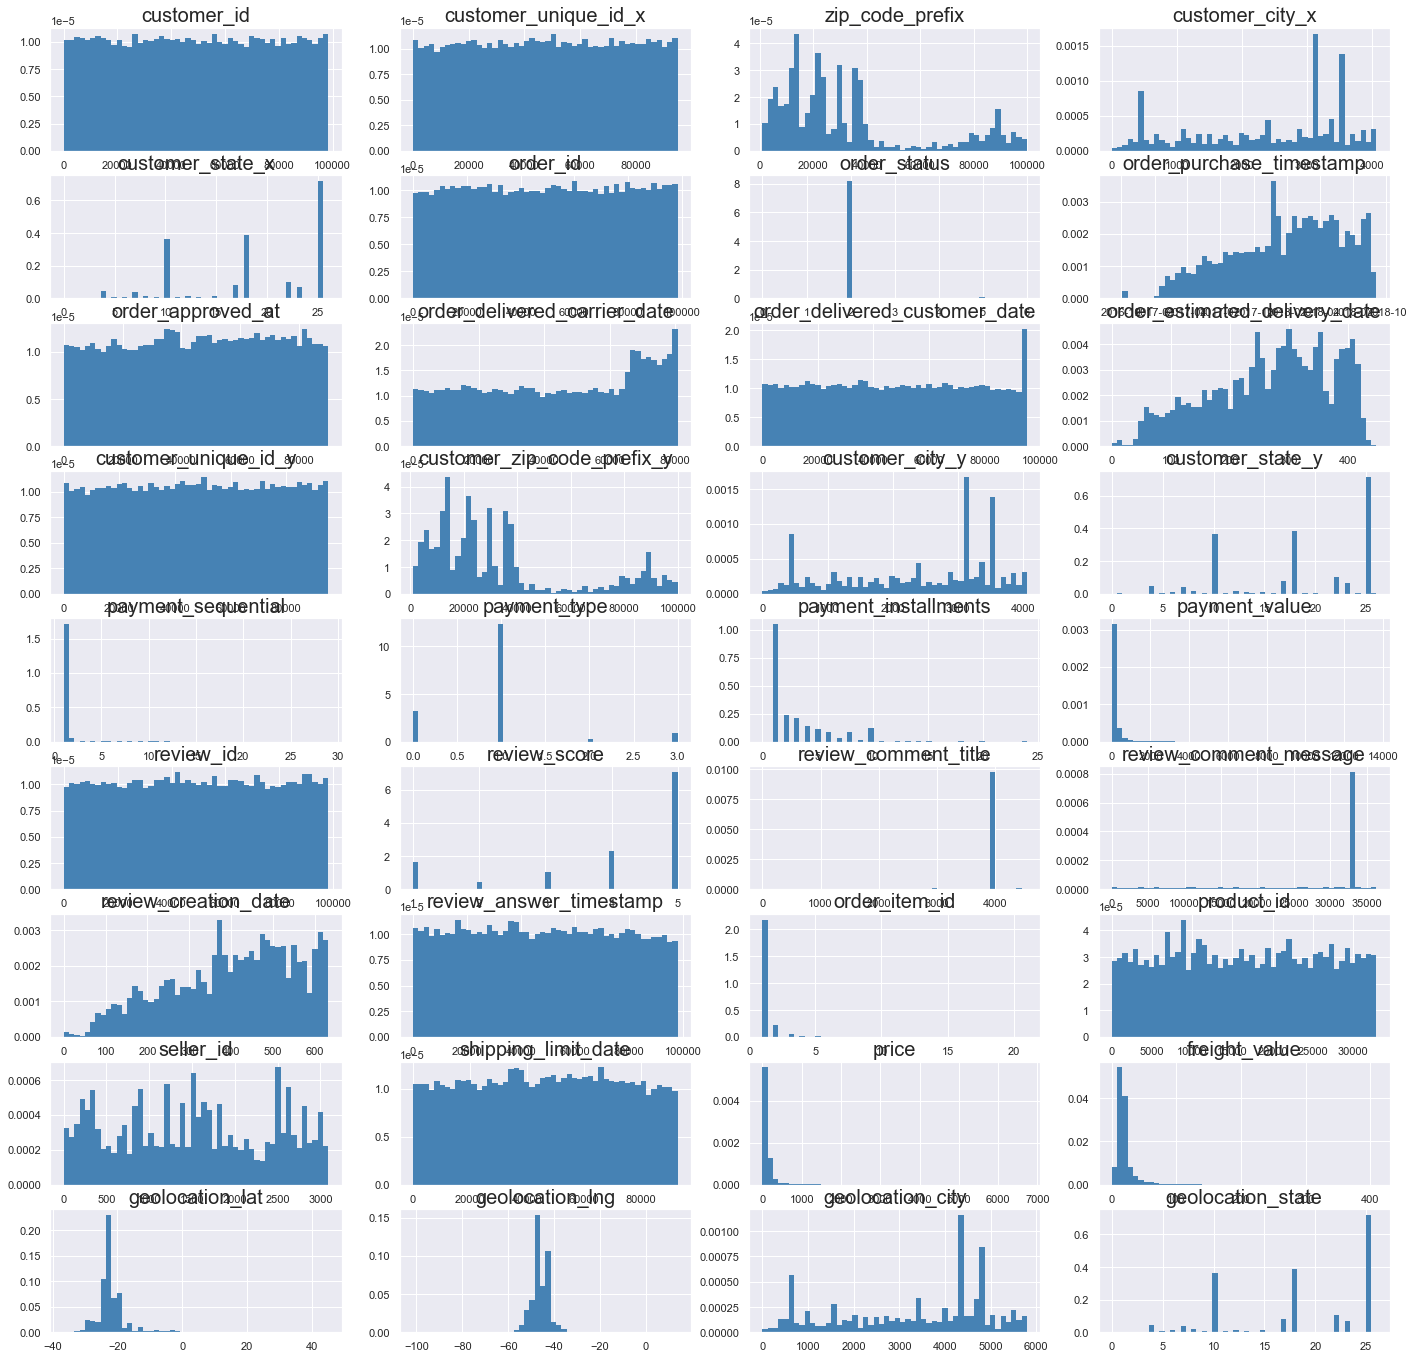

In [65]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X10.shape[1]):
    ax = fig.add_subplot(9,4, (feat_idx+1))
    ax.set_title(XCustomer.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X10[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')